In [26]:
import numpy as np

pi = 3.14159
kb = 1.38065e-23
h = 6.62607e-34
me = 9.109e-31
Na = 6.022e23
ec = 1.6e-19
level = 127109.842
j = 3/2
T = np.arange(2800, 40001, 400)  # Avoiding T=0 to prevent division by zero and logarithm of zero

lnqA = np.zeros_like(T, dtype=np.float64)
qA = np.zeros_like(T, dtype=np.float64)
for i in range(len(T)):
    lnqA[i] = 1.5 * np.log((2 * pi * kb * 0.039948) / (Na * h ** 2)) + 1.5 * np.log(T[i]) 
    qA[i] = np.exp(lnqA[i])
    
    
lnqI = np.zeros_like(T, dtype=np.float64)
lnqI1 = np.zeros_like(T, dtype=np.float64)
lnqI2 = np.zeros_like(T, dtype=np.float64)
lnqI3 = np.zeros_like(T, dtype=np.float64)
qI = np.zeros_like(T, dtype=np.float64)   
for i in range(len(T)):
    lnqI1[i] = 1.5 * np.log((2 * np.pi * kb * 0.039947) / (Na * h ** 2)) + 1.5 * np.log(T[i]) 
    lnqI2[i] = np.log(2*j+1)
#     lnqI3[i] = np.log(np.exp(-level*ec/kb*T[i])) 
#     lnqI[i] =  lnqI1[i] + lnqI2[i] +lnqI3[i] 
    lnqI[i] =  lnqI1[i] + lnqI2[i]
    qI[i] =   np.exp(lnqI[i])
# qI =  np.exp(lnqI)


lnqe = np.zeros_like(T, dtype=np.float64)
qe = np.zeros_like(T, dtype=np.float64)
for i in range(len(T)):
    lnqe[i] = 1.5 * np.log((2 * pi * kb * me) / (h ** 3)) + 1.5 * np.log(T[i])
    qe[i] = 2 * np.exp(lnqe[i])

rat = np.zeros_like(T, dtype=np.float64)
nI = np.zeros_like(T, dtype=np.float64)
nA = np.zeros_like(T, dtype=np.float64)
ec = 1.6e-19

for i in range(len(T)):
    rat[i] = 2*((qI[i] * qe[i]) / qA[i]) * np.exp(-157.724 * ec / (T[i] * kb))
    D = np.sqrt((4*101325) / (kb * T[i] * rat[i]))
    nI[i] = D * rat[i] / 2
    nA[i] = (nI[i] ** 2) / rat[i]

print("s.No           Temperature (K)       Ar                             Ar+")
for index, (temp, nA_val, nI_val) in enumerate(zip(T, nA, nI), start=1):
    print("{:<15} {:<20} {:<30} {:<30}".format(index, temp, nA_val, nI_val))


s.No           Temperature (K)       Ar                             Ar+
1               2800                 2.621048057074567e+24          1.6585253069377584e-91        
2               3200                 2.293417049940245e+24          8.979897529528646e-74         
3               3600                 2.0385929332802185e+24         5.591699823771543e-60         
4               4000                 1.8347336399521965e+24         6.083740656727163e-49         
5               4400                 1.6679396726838146e+24         6.533212642157614e-40         
6               4800                 1.528944699960164e+24          2.1965809315495157e-32        
7               5200                 1.4113335691939974e+24         5.141890392686202e-26         
8               5600                 1.310524028537283e+24          1.483148946430985e-20         
9               6000                 1.2231557599681304e+24         8.012276309108252e-16         
10              6400                 

In [27]:
!pip install matplotlib -q

import matplotlib.pyplot as plt

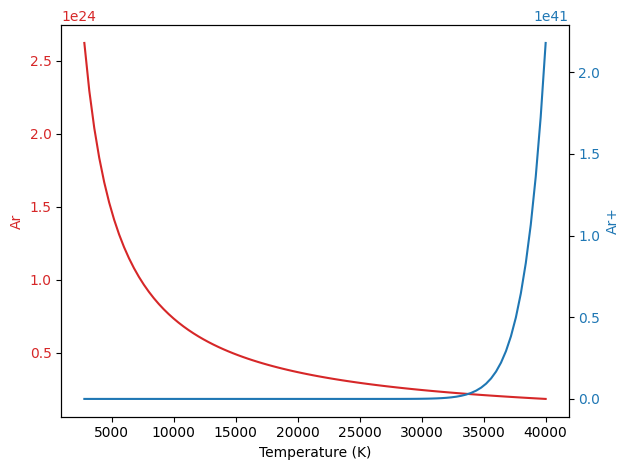

In [28]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Temperature (K)')
ax1.set_ylabel('Ar', color=color)
ax1.plot(T, nA, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Ar+', color=color)
ax2.plot(T, nI, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

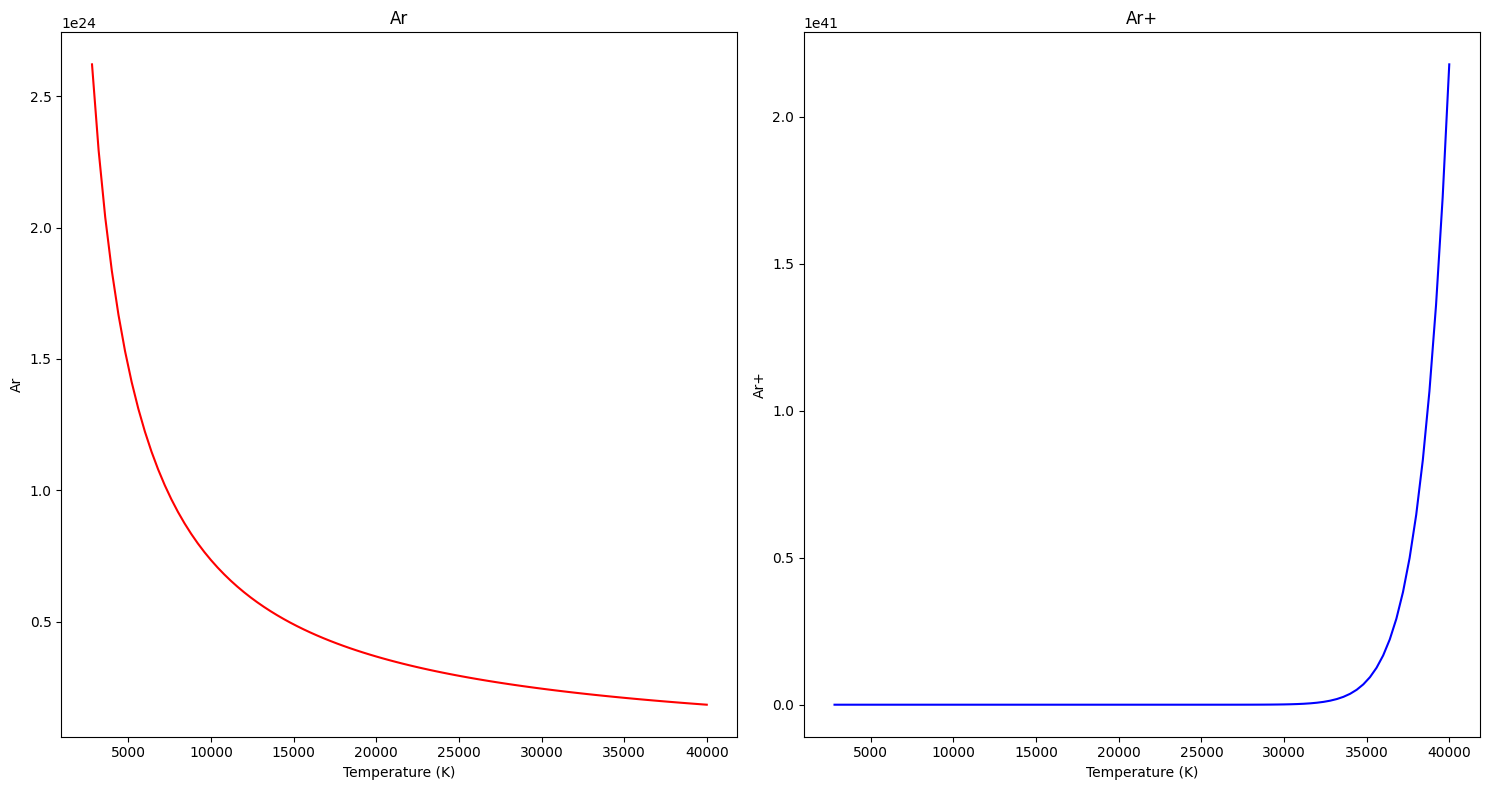

In [29]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.plot(T, nA, 'r')
plt.xlabel('Temperature (K)')
plt.ylabel('Ar')
plt.title('Ar')

plt.subplot(1, 2, 2)
plt.plot(T, nI, 'b')
plt.xlabel('Temperature (K)')
plt.ylabel('Ar+')
plt.title('Ar+')

plt.tight_layout()
plt.show()

In [30]:
import numpy as np

pi = 3.14159
kb = 1.38065e-23
h = 6.62607e-34
me = 9.109e-31
Na = 6.022e23
ec = 1.6e-19
level = 127109.842
j = 3/2

T = np.arange(2800, 40001, 400)  # Avoiding T=0 to prevent division by zero and logarithm of zero

lnqA = 1.5 * np.log((2 * pi * kb * 0.039948) / (Na * h ** 2)) + 1.5 * np.log(T)
qA = np.exp(lnqA)

lnqI1 = 1.5 * np.log((2 * np.pi * kb * 0.039947) / (Na * h ** 2)) + 1.5 * np.log(T)
lnqI2 = np.log(2 * j + 1)
lnqI3 = -level*ec/kb*T
#     lnqI[i] =  lnqI1[i] + lnqI2[i] +lnqI3[i] 
lnqI = lnqI1 + lnqI2 + lnqI3
qI = np.exp(lnqI)

lnqe = 1.5 * np.log((2 * pi * kb * me) / (h ** 3)) + 1.5 * np.log(T)
qe = 2 * np.exp(lnqe)

rat = 2 * ((qI * qe) / qA) * np.exp(-157.724 * ec / (T * kb))
D = np.sqrt((4 * 101325) / (kb * T * rat))
nI = D * rat / 2
nA = (nI ** 2) / rat

print("s.No           Temperature (K)       Ar                             Ar+")
for index, (temp, nA_val, nI_val) in enumerate(zip(T, nA, nI), start=1):
    print("{:<15} {:<20.6e} {:<30.6e} {:<30.6e}".format(index, temp, nA_val, nI_val))

s.No           Temperature (K)       Ar                             Ar+
1               2.800000e+03         nan                            nan                           
2               3.200000e+03         nan                            nan                           
3               3.600000e+03         nan                            nan                           
4               4.000000e+03         nan                            nan                           
5               4.400000e+03         nan                            nan                           
6               4.800000e+03         nan                            nan                           
7               5.200000e+03         nan                            nan                           
8               5.600000e+03         nan                            nan                           
9               6.000000e+03         nan                            nan                           
10              6.400000e+03         

/tmp/ipykernel_33/2601468805.py:28: RuntimeWarning: divide by zero encountered in divide
  D = np.sqrt((4 * 101325) / (kb * T * rat))
/tmp/ipykernel_33/2601468805.py:29: RuntimeWarning: invalid value encountered in multiply
  nI = D * rat / 2


In [32]:
import numpy as np

pi = 3.14159
kb = 1.38065e-23
h = 6.62607e-34
me = 9.109e-31
Na = 6.022e23
ec = 1.6e-19
level = 127109.842
j = 3/2

T = np.arange(2800, 40001, 400)  # Avoiding T=0 to prevent division by zero and logarithm of zero

lnqA = 1.5 * np.log((2 * pi * kb * 0.039948) / (Na * h ** 2)) + 1.5 * np.log(T)
print("lnqA:", np.isnan(lnqA).any())  # Check for NaN in lnqA
qA = np.exp(lnqA)

lnqI1 = 1.5 * np.log((2 * np.pi * kb * 0.039947) / (Na * h ** 2)) + 1.5 * np.log(T)
lnqI2 = np.log(2 * j + 1)
lnqI3 = -level * ec / (kb * T)  # Numerically stable expression
lnqI = lnqI1 + lnqI2 + lnqI3
print("lnqI:", np.isnan(lnqI).any())  # Check for NaN in lnqI
qI = np.exp(lnqI)

lnqe = 1.5 * np.log((2 * pi * kb * me) / (h ** 3)) + 1.5 * np.log(T)
print("lnqe:", np.isnan(lnqe).any())  # Check for NaN in lnqe
qe = 2 * np.exp(lnqe)

rat = 2 * ((qI * qe) / qA) * np.exp(-157.724 * ec / (T * kb))
print("rat:", np.isnan(rat).any())  # Check for NaN in rat
D = np.sqrt((4 * 101325) / (kb * T * rat))
print("D:", np.isnan(D).any())  # Check for NaN in D
nI = D * rat / 2
print("nI:", np.isnan(nI).any())  # Check for NaN in nI
nA = (nI ** 2) / rat
print("nA:", np.isnan(nA).any())  # Check for NaN in nA

print("s.No           Temperature (K)       Ar                             Ar+")
for index, (temp, nA_val, nI_val) in enumerate(zip(T, nA, nI), start=1):
    print("{:<15} {:<20.6e} {:<30.6e} {:<30.6e}".format(index, temp, nA_val, nI_val))

lnqA: False
lnqI: False
lnqe: False
rat: False
D: False
nI: True
nA: True
s.No           Temperature (K)       Ar                             Ar+
1               2.800000e+03         nan                            nan                           
2               3.200000e+03         nan                            nan                           
3               3.600000e+03         nan                            nan                           
4               4.000000e+03         nan                            nan                           
5               4.400000e+03         nan                            nan                           
6               4.800000e+03         nan                            nan                           
7               5.200000e+03         nan                            nan                           
8               5.600000e+03         nan                            nan                           
9               6.000000e+03         nan                      

/tmp/ipykernel_33/3177925591.py:31: RuntimeWarning: divide by zero encountered in divide
  D = np.sqrt((4 * 101325) / (kb * T * rat))
/tmp/ipykernel_33/3177925591.py:33: RuntimeWarning: invalid value encountered in multiply
  nI = D * rat / 2
